MeCab が Colabに入っていないので。。。

In [ ]:
!apt install aptitude

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  aptitude-common libcgi-fast-perl libcgi-pm-perl libclass-accessor-perl
  libcwidget3v5 libencode-locale-perl libfcgi-perl libhtml-parser-perl
  libhtml-tagset-perl libhttp-date-perl libhttp-message-perl libio-html-perl
  libio-string-perl liblwp-mediatypes-perl libparse-debianchangelog-perl
  libsigc++-2.0-0v5 libsub-name-perl libtimedate-perl liburi-perl libxapian30
Suggested packages:
  aptitude-doc-en | aptitude-doc apt-xapian-index debtags tasksel
  libcwidget-dev libdata-dump-perl libhtml-template-perl libxml-simple-perl
  libwww-perl xapian-tools
The following NEW packages will be installed:
  aptitude aptitude-common libcgi-fast-perl libcgi-pm-perl
  libclass-accessor-perl libcwidget3v5 libencode-locale-perl libfcgi-perl
  libhtml-parser-perl libhtml-tagset-perl libhttp-date-perl
  libhttp-message-perl libio-html-perl libio-string

In [ ]:
!aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y

git is already installed at the requested version (1:2.17.1-1ubuntu0.8)
make is already installed at the requested version (4.1-9.1ubuntu1)
curl is already installed at the requested version (7.58.0-2ubuntu3.14)
xz-utils is already installed at the requested version (5.2.2-1.3)
git is already installed at the requested version (1:2.17.1-1ubuntu0.8)
make is already installed at the requested version (4.1-9.1ubuntu1)
curl is already installed at the requested version (7.58.0-2ubuntu3.14)
xz-utils is already installed at the requested version (5.2.2-1.3)
The following NEW packages will be installed:
  file libmagic-mgc{a} libmagic1{a} libmecab-dev libmecab2{a} mecab mecab-ipadic{a} mecab-ipadic-utf8 mecab-jumandic{a} mecab-jumandic-utf8{a} mecab-utils{a} 
0 packages upgraded, 11 newly installed, 0 to remove and 40 not upgraded.
Need to get 29.3 MB of archives. After unpacking 282 MB will be used.
Get: 1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libmagic-mgc amd64 1:5.32-2

In [ ]:
!pip install mecab-python3==0.7

     |████████████████████████████████| 41 kB 489 kB/s 
  Created wheel for mecab-python3: filename=mecab_python3-0.7-cp37-cp37m-linux_x86_64.whl size=156609 sha256=48ef6dc55810b612ac9f3ce47ad1412294fe95b41a60d294b87d06782024757c
  Stored in directory: /root/.cache/pip/wheels/47/46/95/3748ec2c4936cb69ee4d248a85e862064ea1e84819344c5292
Successfully built mecab-python3


## "Webスクレイピング"という技術を用いて、データを収集します

In [ ]:
import re
import time
import requests
import MeCab
import nltk
from bs4 import BeautifulSoup

In [ ]:
# URLからテキスト情報をスクレイピング
# 渡すものは、URLをリスト化したもの
def geturl_webscraping(urls):
    '''
    :param urls:
    :return:
    '''
    all_text = []
    #for (url, num_tqdm) in (urls, tqdm(urls[0], desc='geturl_webscraping')):
    for url in urls:
        # 何かしら例外処理が発生しても、スルーします
        try:
            r = requests.get(url) # 任意のURLに対して、そのページのソースをgetしてきます
            c = r.content # ページソースの要素を取得します
            soup = BeautifulSoup(c, "html.parser") # htmlソースを構造解析します
            article1_content = soup.find_all("p") # pタグをすべて取得します
            temp = []
            for con in article1_content: # 記事らしき文章を収集します
                out = con.text
                temp.append(out)
            text = ''.join(temp)
            all_text.append(text)
            time.sleep(1)
        except:
            print("%s could not be webscraping...check your url" %(url))
    return all_text

In [ ]:
test_text = geturl_webscraping(['https://www.pref.miyagi.jp/'])

In [ ]:
test_text

['JavaScriptが無効のため、文字の大きさ・背景色を変更する機能を使用できません。本文宮城県災害・気象情報には、「気象注意報・警報情報」、「地震情報」、「津波情報」が掲載されています。新型コロナウイルス感染症対策サイト\n県内の発生状況\n確保病床数，感染状況の指標\nPCR等検査実施件数・健康相談件数\n県民の意見提出手続(パブリックコメント)県広告事業について\n宮城県公式Webサイト\r\n\t\t\t〒980-8570 宮城県仙台市青葉区本町3丁目8番1号｜法人番号8000020040002\nTel:022-211-2111｜県庁への行き方｜県庁県民駐車場\nCopyright © Miyagi Prefectural Government. All Rights Reserved']

In [ ]:
# それらをMeCabで形態素解析。名詞だけ抽出。
def mplg(text):
    '''
    :param text:
    :return:
    '''
    word_list = []
    # 日本語でなければ(おそらく英語なので), NLTKで分かち書き
    # 日本語であれば, Mecabで分かち書き
    if re.search(r'[ぁ-ん]+', text) == None and re.search(r'[ァ-ン]+', text) == None:
        # nltk.word_tokenize で単語分割
        words = nltk.word_tokenize(text)
        # tupleのリストになっているので, NN, NNPに該当するものを抽出
        for word in nltk.pos_tag(words):
            if word[1] == "NN" or word[1] == "NNP" or word[1] == "NNS" or word[1] == "NNPS":
                word_list.append(word[0])

        return word_list

    else:
        m = MeCab.Tagger()
        m1 = m.parse(text)
        for row in m1.split("\n"):
            # タブ区切りになっている１つ目を取り出す。ここには形態素が格納されている
            word = row.split("\t")[0]
            if word == "EOS":
                break
            else:
                # タブ区切りになっている2つ目を取り出す。ここには品詞が格納されている
                pos = row.split("\t")[1]
                slice = pos[:2]
                if slice == "名詞":
                    word_list.append(word)
        return word_list

def excute_word_detector(word):
    '''
    :param word:
    :return:
    '''

    dict_excute_words = [
        'こと',
        'こちら',
        'よう',
        'ため',
        'もの',
        'これ',
        'あれ',
        'それ',
        'ここ',
        'さまざま',
        '新た',
        'それら',
        'あなた',
        'それぞれ',
        'うち',
        'いま',
        'その他',
        'みなさん',
        'わたし'
    ]

    for i in dict_excute_words:
        if word == i:
            return False

def make_key_filename(target_competitor_text):
    '''
    :param target_competitor_text:
    :return:
    '''
    text = re.sub(r'[+]', "", target_competitor_text)
    text = re.sub(r'[-]', "", text)
    text = re.sub(r'[/]', "", text)
    text = re.sub(r'[ ]', "", text)
    text = re.sub(r'[.]', "", text)
    text = re.sub(r'[︰-＠]', "", text)
    return text

def make_context_list(target_urls):
    '''
    :param target_urls:
    :return:
    '''
    context_list = []
    texts = geturl_webscraping(target_urls)
    for text in texts:
        context_list.append(mplg(text))
    return context_list

def clean_words(context_list):
    '''
    :param context_list:
    :return:
    '''
    words_list = []
    clean_noise_symbol = re.compile('[!"#$%&\'\\\\()*+,-./:;<=>?@[\\]^_`{|}~「」〔〕“”〈〉『』【】＆＊・（）＄＃＠。、？！｀＋￥％]')
    clean_noise_number = re.compile('[0-9]')
    clean_noise_blank = re.compile('[\t\n\r\f\v]')
    for i in context_list:
        for j in i:
            cleaned_text = clean_noise_symbol.sub('', j)
            cleaned_text = clean_noise_number.sub('', cleaned_text)
            cleaned_text = clean_noise_blank.sub('', cleaned_text)
            if len(cleaned_text) > 1:
                words_list.append(cleaned_text)
    return words_list

def make_words_excute(words_list):
    '''
    :param words_list:
    :return:
    '''
    words = []
    for word in words_list:
        if excute_word_detector(word) == False:
            continue
        else:
            words.append(word)
    return words

def make_words_chain(words):
    '''
    :param words:
    :return:
    '''
    words_chain = ""
    for i in words:
        words_chain += " " + str(i)
    return words_chain

In [ ]:
context_list = make_context_list(['https://www.pref.miyagi.jp/'])
words_list = clean_words(context_list)
words = make_words_excute(words_list)

In [ ]:
words

['JavaScript',
 '無効',
 '文字',
 '背景',
 '変更',
 '機能',
 '使用',
 '本文',
 '宮城',
 '災害',
 '気象',
 '情報',
 '気象',
 '注意報',
 '警報',
 '情報',
 '地震',
 '情報',
 '津波',
 '情報',
 '掲載',
 '新型',
 'コロナ',
 'ウイルス',
 '感染',
 '対策',
 'サイト',
 '県内',
 '発生',
 '状況',
 '確保',
 '病床',
 '感染',
 '状況',
 '指標',
 'PCR',
 '検査',
 '実施',
 '件数',
 '健康',
 '相談',
 '件数',
 '県民',
 '意見',
 '提出',
 '手続',
 'パブリック',
 'コメント',
 '広告',
 '事業',
 '宮城',
 '公式',
 'Web',
 'サイト',
 '宮城',
 '仙台',
 '青葉',
 '本町',
 '丁目',
 '法人',
 '番号',
 'Tel',
 '県庁',
 '県庁',
 '県民',
 '駐車',
 'Copyright',
 'Miyagi',
 'Prefectural',
 'Government',
 'All',
 'Rights',
 'Reserved']

In [ ]:
# 記事の塊のdict(辞書型)について、まとめて形態素解析＆リストで返す関数
def get_words_from_text(text):
    return get_words(text)

# 一つの記事について形態素解析してリストとして返す関数
def get_words(context):
    return [token for token in tokenizer(context)]

# 形態素解析で、名詞のみを取り出す関数
def tokenizer(text):
    node = mecab.parseToNode(text)
    while node:
        if node.feature.split(',')[0] == '名詞':
            yield node.surface.lower()
        node = node.next

In [ ]:
SAMPLE_URL_LINK = [
                    'https://www.pref.miyagi.jp/',
                    'https://www.city.sendai.jp/',
                    'https://www.miyagi-kankou.or.jp/',
                    'https://ja.wikipedia.org/wiki/%E5%AE%AE%E5%9F%8E%E7%9C%8C',
                    'https://www.city.natori.miyagi.jp/',
                    'https://www.city.ishinomaki.lg.jp/index.html',
                    'http://www.miyagi-sfk.net/',
                    'https://www.city.tagajo.miyagi.jp/',
                    'https://www.city.tome.miyagi.jp/'
]

In [ ]:
test_text = geturl_webscraping(SAMPLE_URL_LINK)

In [ ]:
test_text

['JavaScriptが無効のため、文字の大きさ・背景色を変更する機能を使用できません。本文宮城県災害・気象情報には、「気象注意報・警報情報」、「地震情報」、「津波情報」が掲載されています。新型コロナウイルス感染症対策サイト\n県内の発生状況\n確保病床数，感染状況の指標\nPCR等検査実施件数・健康相談件数\n県民の意見提出手続(パブリックコメント)県広告事業について\n宮城県公式Webサイト\r\n\t\t\t〒980-8570 宮城県仙台市青葉区本町3丁目8番1号｜法人番号8000020040002\nTel:022-211-2111｜県庁への行き方｜県庁県民駐車場\nCopyright © Miyagi Prefectural Government. All Rights Reserved',
 'このサイトではJavaScriptを使用したコンテンツ・機能を提供しています。JavaScriptを有効にするとご利用いただけます。本文へスキップします。閲覧補助機能読み上げ\n\n\n\nForeign LanguageSelect Languageサイトマップここから本文です。\n\n\n\n\n\n検索方法区役所から探す防災・緊急情報FAQ よくある質問と回答仙台市総合コールセンター 杜の都教えてコール 電話番号022-398-4894つなぐおもいつながる東日本大震災から10年SENDAI魅力ナビ市長室へようこそ Mayor of Sendai仙台市議会 Sendai Assembly9月3日新型コロナウイルス感染症の患者の発生等について（仙台市内9329~9394例目）9月3日就職氷河期世代の正社員就職を応援！「オンライン就職フェア」を開催します9月2日新型コロナウイルス感染症定例報告会（9月2日開催）9月2日死亡が確認された方からの新型コロナウイルスの検出について（仙台市内9328例目）9月2日新型コロナウイルス感染症の患者の発生等について（仙台市内9231~9327例目）広告掲載案内このページの先頭へ戻る市役所・区役所などの一般的な業務時間は8時30分～17時00分です。\r\n(土日祝日および12月29日～1月3日はお休みです）ただし、施設によって異なる場合があります。仙台市総合コールセンター022-398-4894\n8時～20時（土日祝日および

In [ ]:
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [ ]:
context_list = make_context_list(SAMPLE_URL_LINK)
words_list = clean_words(context_list)
words = make_words_excute(words_list)

In [ ]:
len(words)

2569

In [ ]:
# ユーザー認証
from google.colab import auth
auth.authenticate_user()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import csv

In [ ]:
with open('/content/drive/My Drive/NLP_TRAINING/stop_words.txt') as f:
    reader = csv.reader(f)
    stop_words = [row[0] for row in reader]

In [ ]:
stop_words

['お願い',
 '記号',
 '番号',
 '振込',
 '店名',
 '預金',
 '口座',
 'ちょ',
 '口コミ',
 '回答',
 '平均',
 '年収',
 '正社員',
 '残業',
 '時間',
 '月間',
 '個人',
 '情報',
 '取り扱い',
 '規約',
 'ガイドライン',
 'ヘルプ',
 '問い合わせ',
 '概要',
 'Copyright',
 'All',
 'Rights',
 'Reserved',
 'マイ',
 'ページ',
 'ログイン',
 '賞与',
 '福利厚生',
 '福利',
 '厚生',
 '社会保険',
 '厚生年金',
 '年金',
 '補助',
 '終了',
 '掲載',
 '開始',
 '当該',
 'あて',
 '代表',
 '取締',
 '社長',
 '中途採用',
 '新卒採用',
 '新卒',
 '中途',
 '採用',
 '弊社',
 '貴社',
 '当社',
 '求人',
 '募集',
 '株式会社',
 '会社',
 'こと',
 'さん',
 'よう',
 '自分',
 'もの',
 'ため',
 'それ',
 'そう',
 'たち',
 'これ',
 'とき',
 '場合',
 'ところ',
 '今回',
 '記事',
 '必要',
 '可能',
 '利用',
 '画面',
 'サイト',
 '以上',
 '表示',
 'あなた',
 '現在',
 'わけ',
 '関連',
 '——',
 '最近',
 '部分',
 'ここ',
 'どこ',
 'はず',
 'みたい',
 '感じ',
 '今後',
 '今年',
 'こちら',
 'うち',
 'そこ',
 'みんな',
 'あと',
 'ほう',
 '最初',
 'まま',
 '皆さん',
 '以外',
 '予定',
 'ほか',
 'http',
 'https',
 'ひとつ',
 'co',
 'すべて',
 'type',
 '確か',
 '以下',
 'ちゃん',
 '時期',
 '通り',
 '以前',
 'それぞれ',
 '新た',
 '期間',
 '変化',
 'たくさん',
 'いま',
 'さまざま',
 'いつ',
 'ごと',
 '一つ',
 'これら',
 'どちら',
 'どれ',
 'みなさ

In [ ]:
words_modified = []
for word in words:
    flag = []
    for i in stop_words:
        if i in word:
            flag.append(True)
        else:
            flag.append(False)
    if any(flag):
        pass
    else:
        words_modified.append(word)

In [ ]:
len(words_modified), len(words)

(2264, 2569)

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
FONT_PATH = '/content/drive/My Drive/NLP_TRAINING/ms-pmincho.ttf'

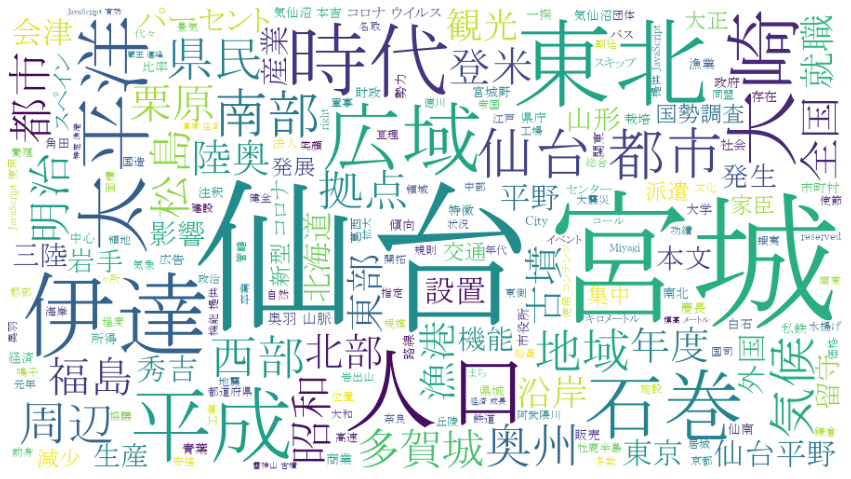

In [ ]:
wordcloud = WordCloud(background_color="white", font_path=FONT_PATH, width=900, height=500).generate(" ".join(words_modified))

plt.figure(figsize=(15,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()